In [1]:
import json
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
def plot_bars(data, title):
  plt.figure(figsize=(24, 12))
  ax = sns.barplot(x=data.index, y=data.values)

  for i in ax.containers:
    ax.bar_label(i,)

  plt.title(title, fontdict={"fontsize": 24})
  plt.xlabel("Results")
  plt.ylabel("Score")

  plt.tight_layout()
  plt.show()


def plot_boxes(data, title):
  plt.figure(figsize=(16, 8))
  plt.suptitle(title, fontsize=24)

  for i, column in enumerate(data.columns):
    plt.subplot(1, len(data.columns), i+1)
    sns.boxplot(y=data[column])
    plt.title(column)
    plt.ylabel('Score')

  plt.tight_layout()
  plt.show()


def plot_lineplot(data, title):
  df_melted = data.melt(id_vars=["generation"], var_name="Variable", value_name="Value")

  plt.figure(figsize=(20, 12))
  sns.lineplot(data=df_melted, x="Variable", y="Value", hue="generation", marker="o")

  plt.title(title)
  plt.xlabel("")
  plt.ylabel("")
  plt.legend(title="Generation")

  plt.tight_layout()
  plt.show()


def plot_3d_schatter(data, title):
  camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=-2, y=1.5, z=1.1)
  )
  
  fig = px.scatter_3d(data, x='sobreposição', y='superlotação', z='características', color='generation')
  fig.update_layout(title=dict(text=title), scene_camera=camera, width=750, height=750, margin=dict(l=50, r=50, b=50, t=50))

  fig.show()

def read_json(path, gen):
  with open(path) as f:
    data = json.load(f)

  columns = ['sobreposição', 'superlotação', 'características']
  df = pd.DataFrame(data, columns=columns)

  df["generation"] = gen

  return df

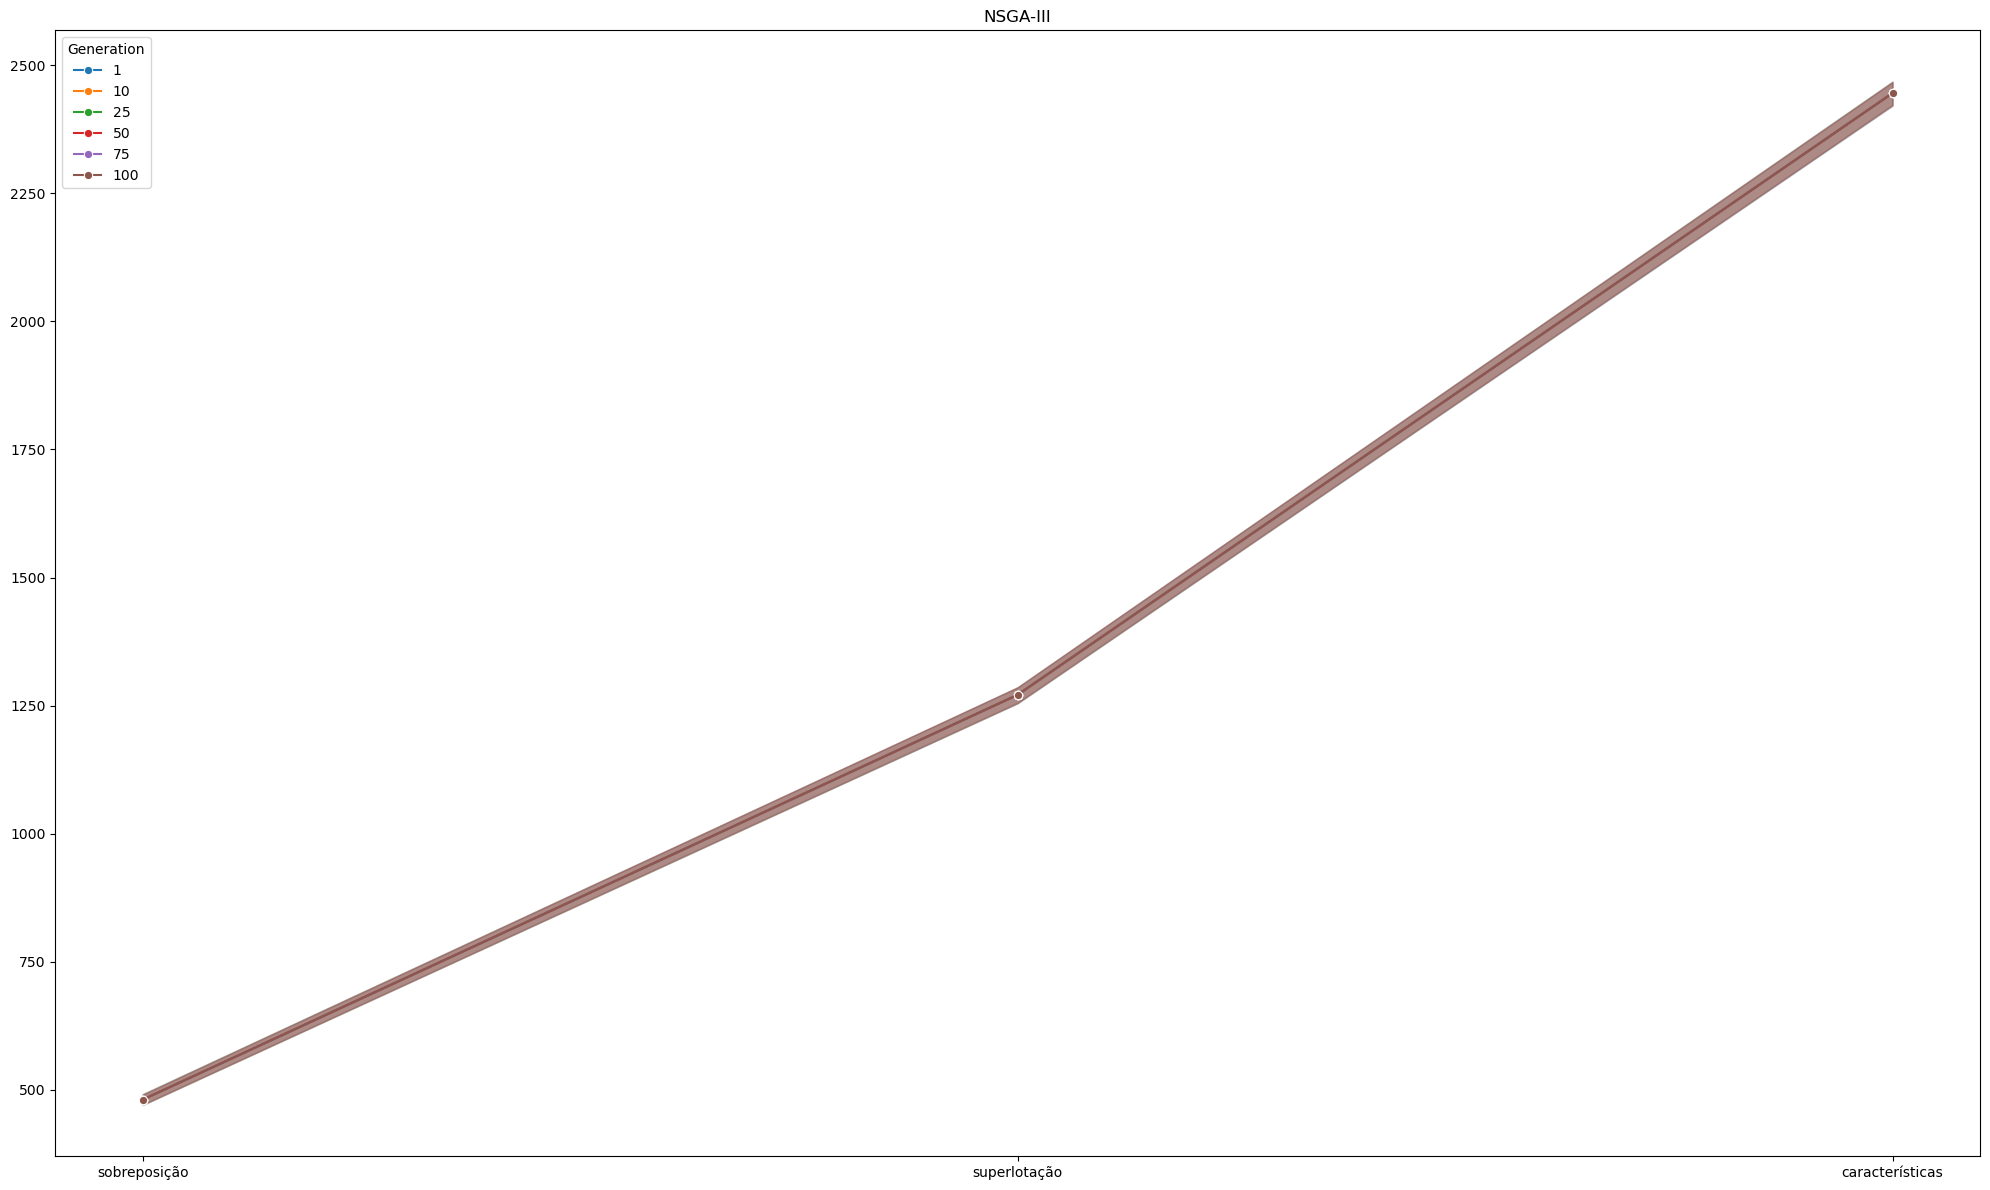

In [3]:
df_nsga_iii_gen_1 = read_json("./results/final/NSGA_III_constraint/score_gen_1.json", "1")
df_nsga_iii_gen_10 = read_json("./results/final/NSGA_III_constraint/score_gen_10.json", "10")
df_nsga_iii_gen_25 = read_json("./results/final/NSGA_III_constraint/score_gen_25.json", "25")
df_nsga_iii_gen_50 = read_json("./results/final/NSGA_III_constraint/score_gen_50.json", "50")
df_nsga_iii_gen_75 = read_json("./results/final/NSGA_III_constraint/score_gen_75.json", "75")
df_nsga_iii_gen_100 = read_json("./results/final/NSGA_III_constraint/score_gen_100.json", "100")
df_NSGA_III = pd.concat([df_nsga_iii_gen_1, df_nsga_iii_gen_10, df_nsga_iii_gen_25, df_nsga_iii_gen_50, df_nsga_iii_gen_75, df_nsga_iii_gen_100])
plot_lineplot(df_NSGA_III, "NSGA-III")

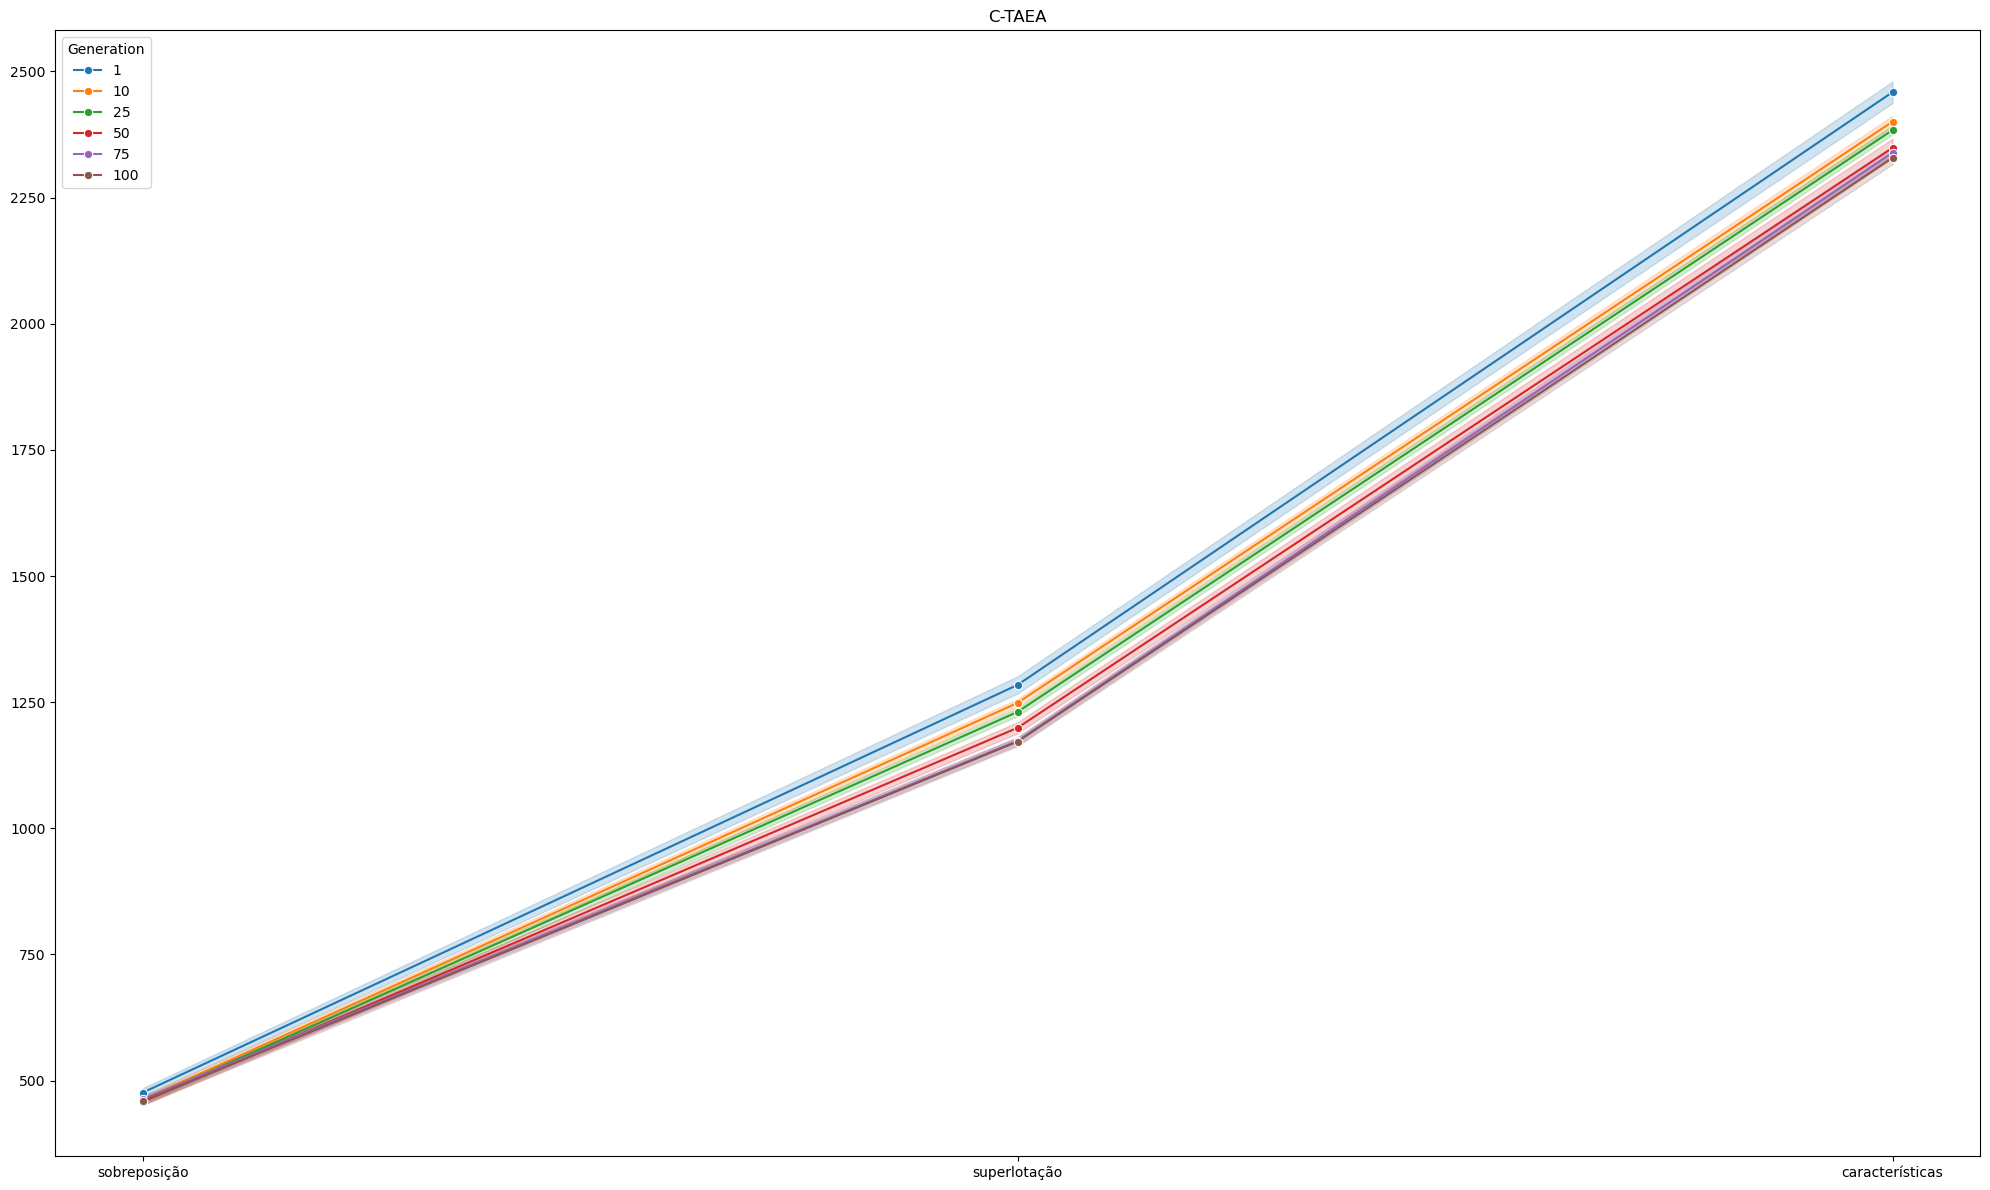

In [4]:
df_c_taea_gen_1 = read_json("./results/final/C_TAEA_constraint/score_gen_1.json", "1")
df_c_taea_gen_10 = read_json("./results/final/C_TAEA_constraint/score_gen_10.json", "10")
df_c_taea_gen_25 = read_json("./results/final/C_TAEA_constraint/score_gen_25.json", "25")
df_c_taea_gen_50 = read_json("./results/final/C_TAEA_constraint/score_gen_50.json", "50")
df_c_taea_gen_75 = read_json("./results/final/C_TAEA_constraint/score_gen_75.json", "75")
df_c_taea_gen_100 = read_json("./results/final/C_TAEA_constraint/score_gen_100.json", "100")
df_C_TAEA = pd.concat([df_c_taea_gen_1, df_c_taea_gen_10, df_c_taea_gen_25, df_c_taea_gen_50, df_c_taea_gen_75, df_c_taea_gen_100])
plot_lineplot(df_C_TAEA, "C-TAEA")

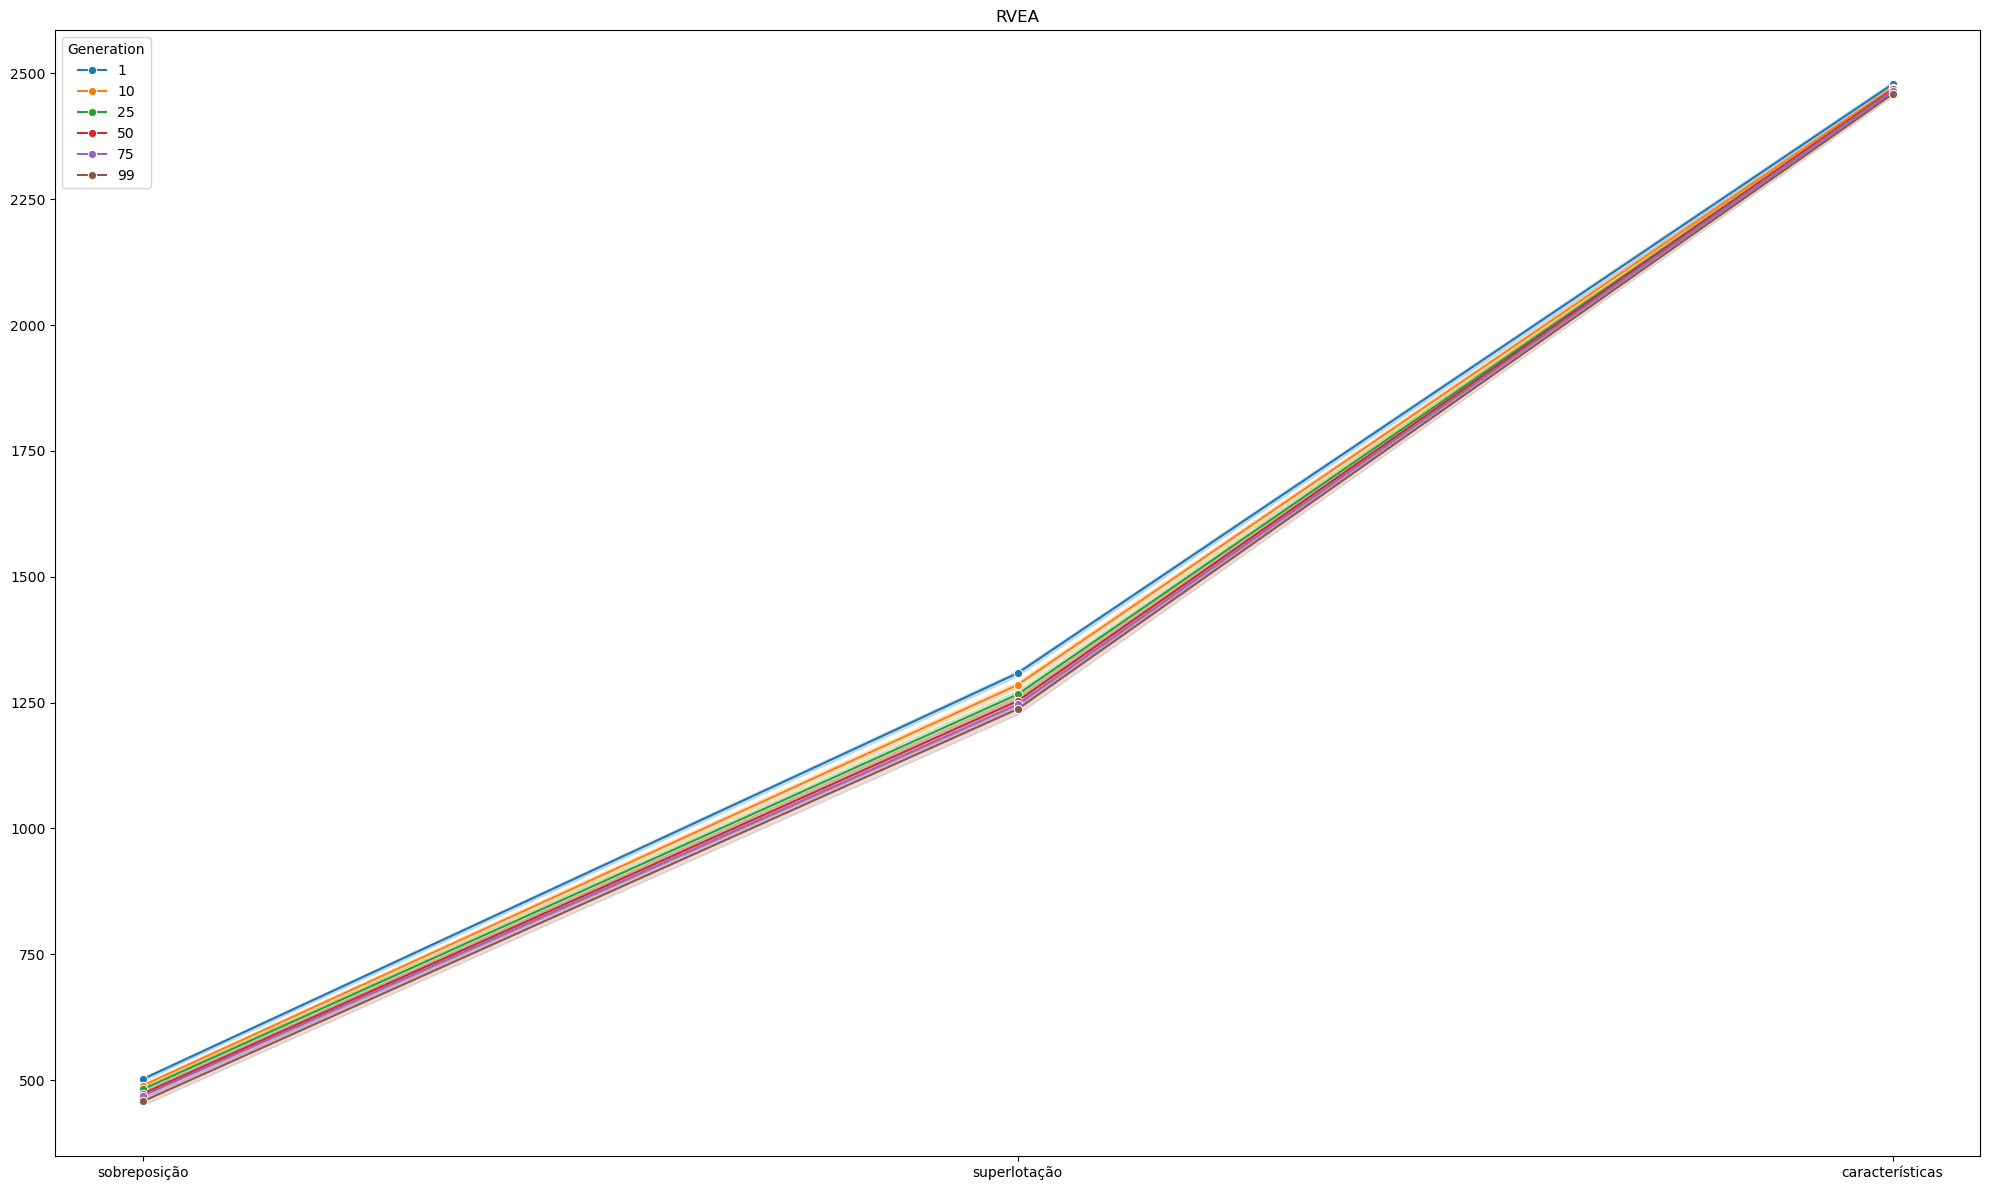

In [5]:
df_rvea_gen_1 = read_json("./results/final/RVEA_constraint/score_gen_1.json", "1")
df_rvea_gen_10 = read_json("./results/final/RVEA_constraint/score_gen_10.json", "10")
df_rvea_gen_25 = read_json("./results/final/RVEA_constraint/score_gen_25.json", "25")
df_rvea_gen_50 = read_json("./results/final/RVEA_constraint/score_gen_50.json", "50")
df_rvea_gen_75 = read_json("./results/final/RVEA_constraint/score_gen_75.json", "75")
df_rvea_gen_99 = read_json("./results/final/RVEA_constraint/score_gen_99.json", "99")
df_RVEA = pd.concat([df_rvea_gen_1, df_rvea_gen_10, df_rvea_gen_25, df_rvea_gen_50, df_rvea_gen_75, df_rvea_gen_99])
plot_lineplot(df_RVEA, "RVEA")

In [6]:
plot_3d_schatter(df_NSGA_III, "NSGA-III")
plot_3d_schatter(df_C_TAEA, "C-TAEA")
plot_3d_schatter(df_RVEA, "RVEA")

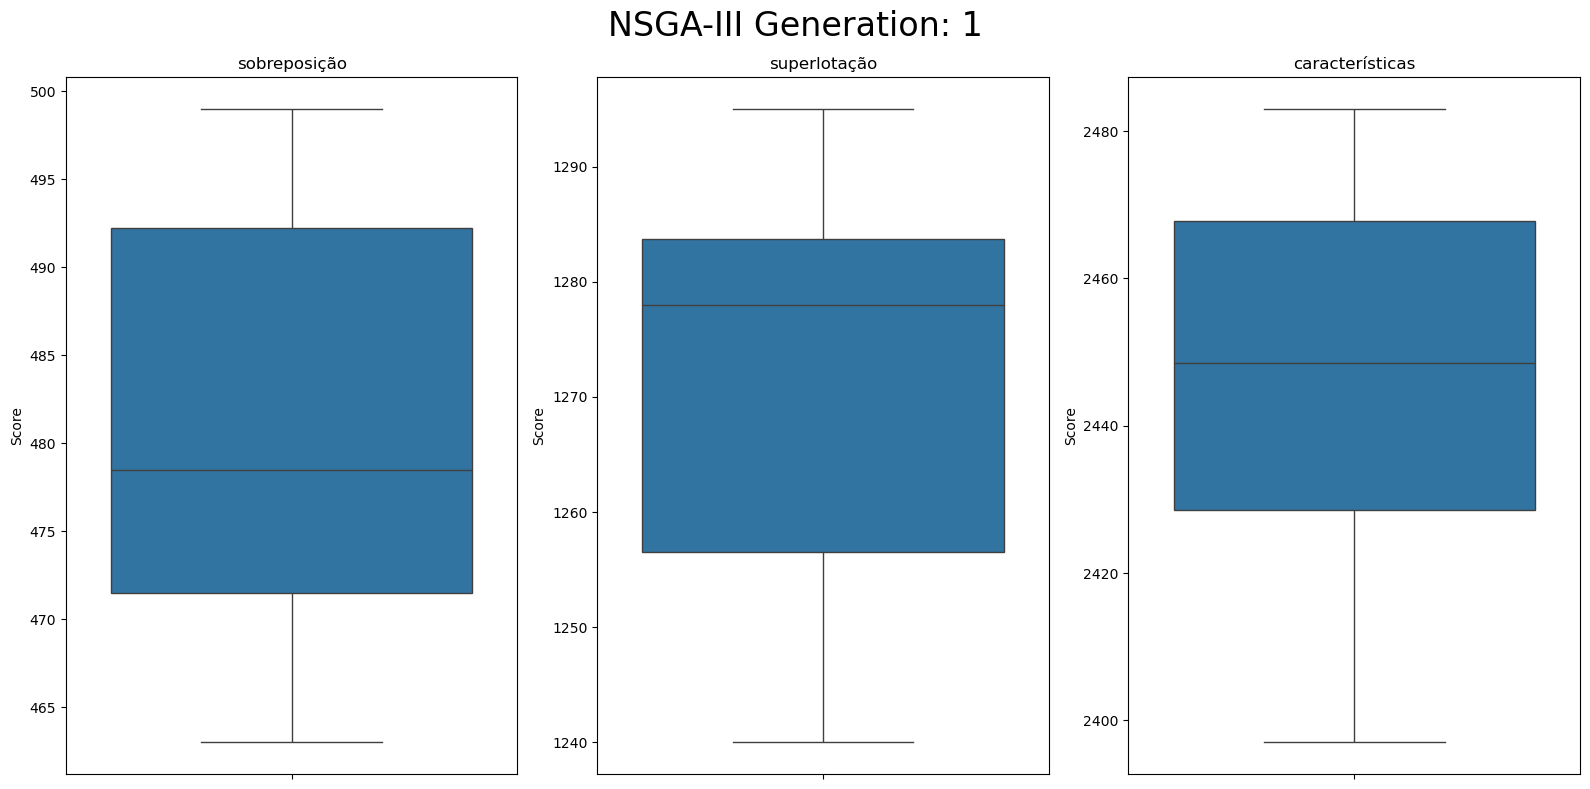

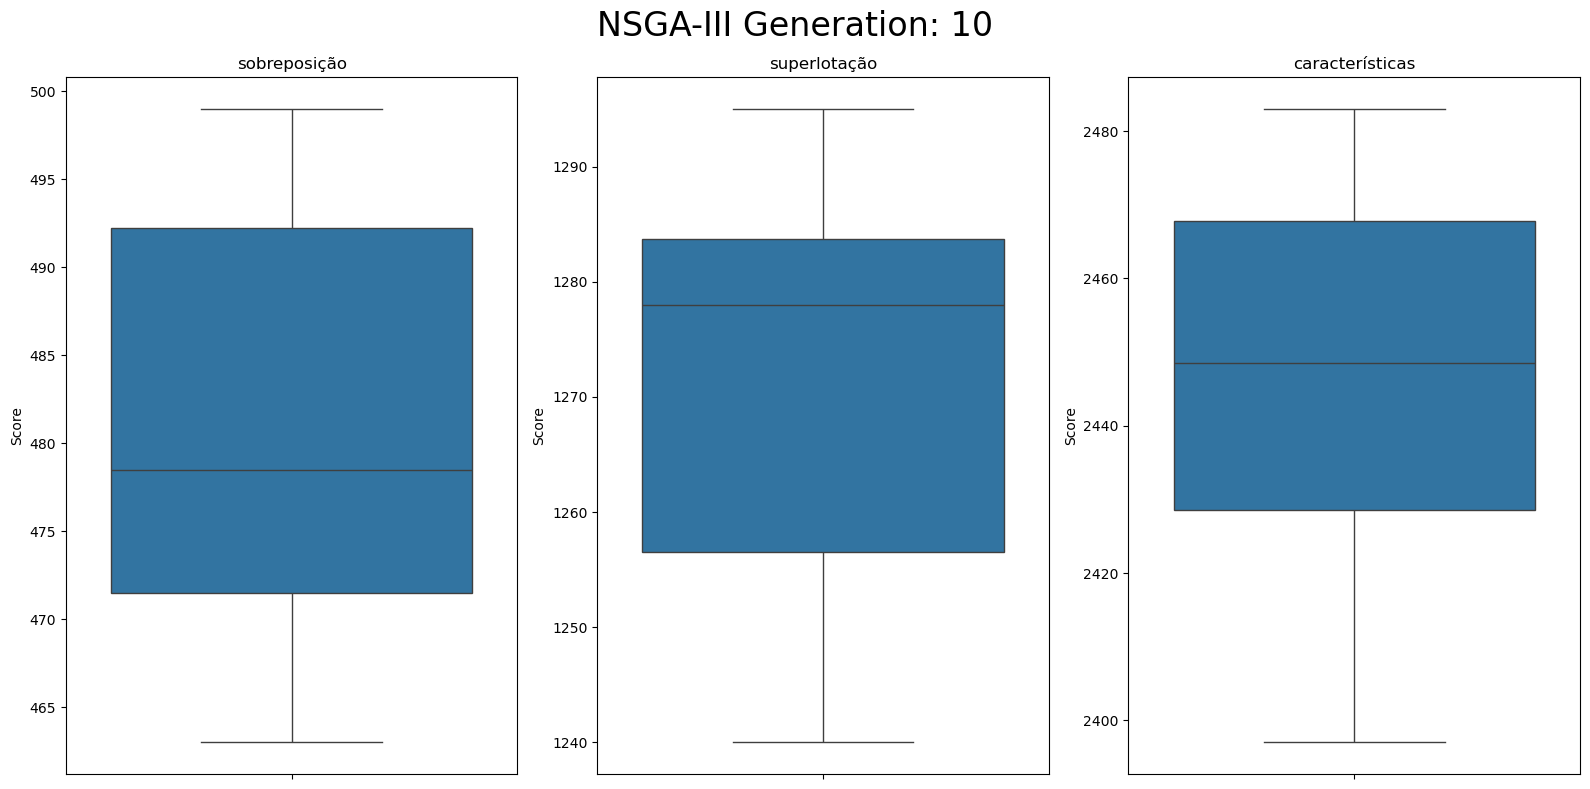

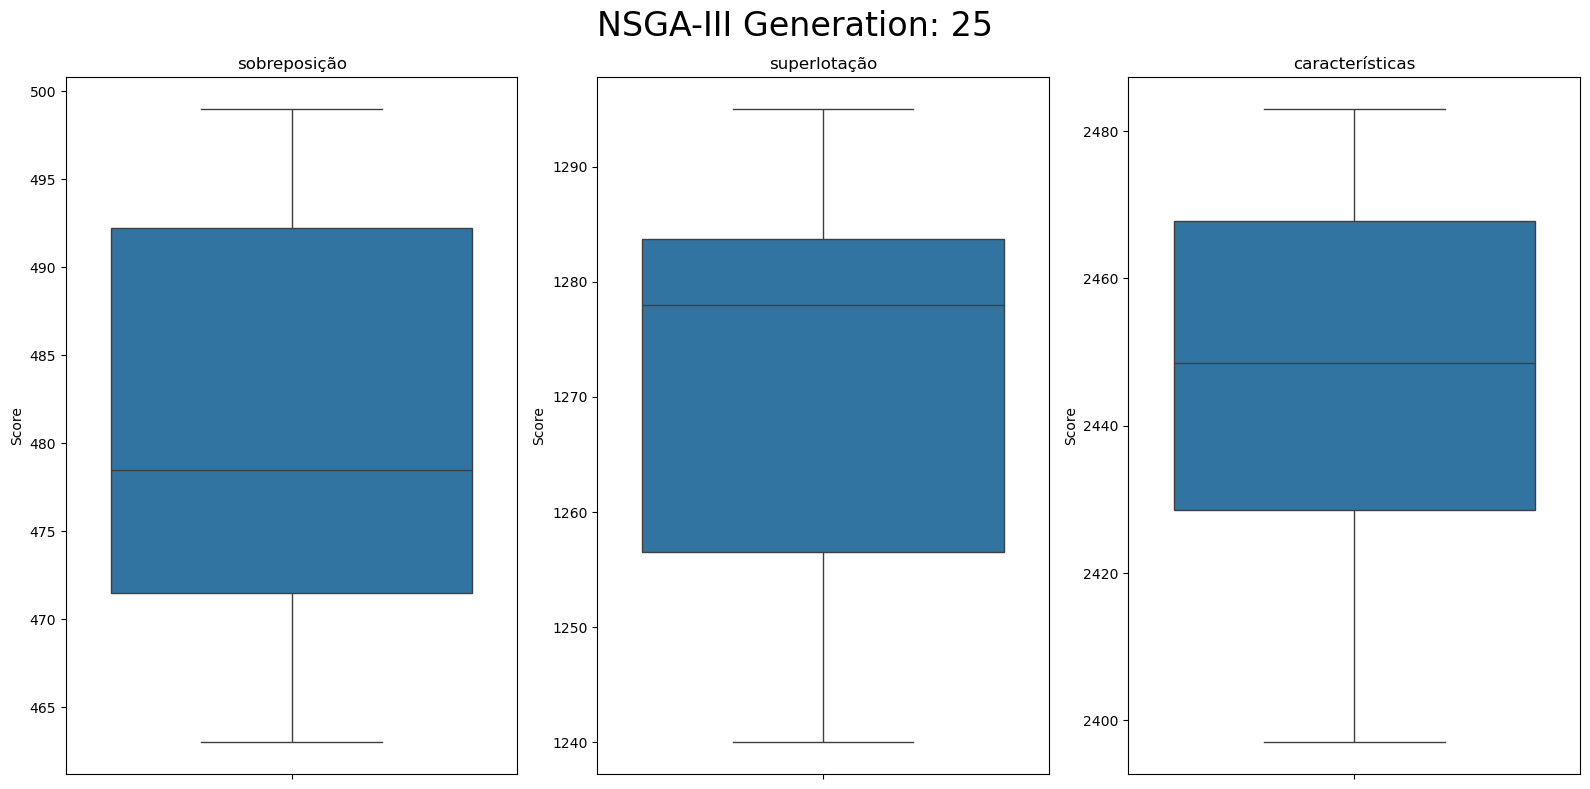

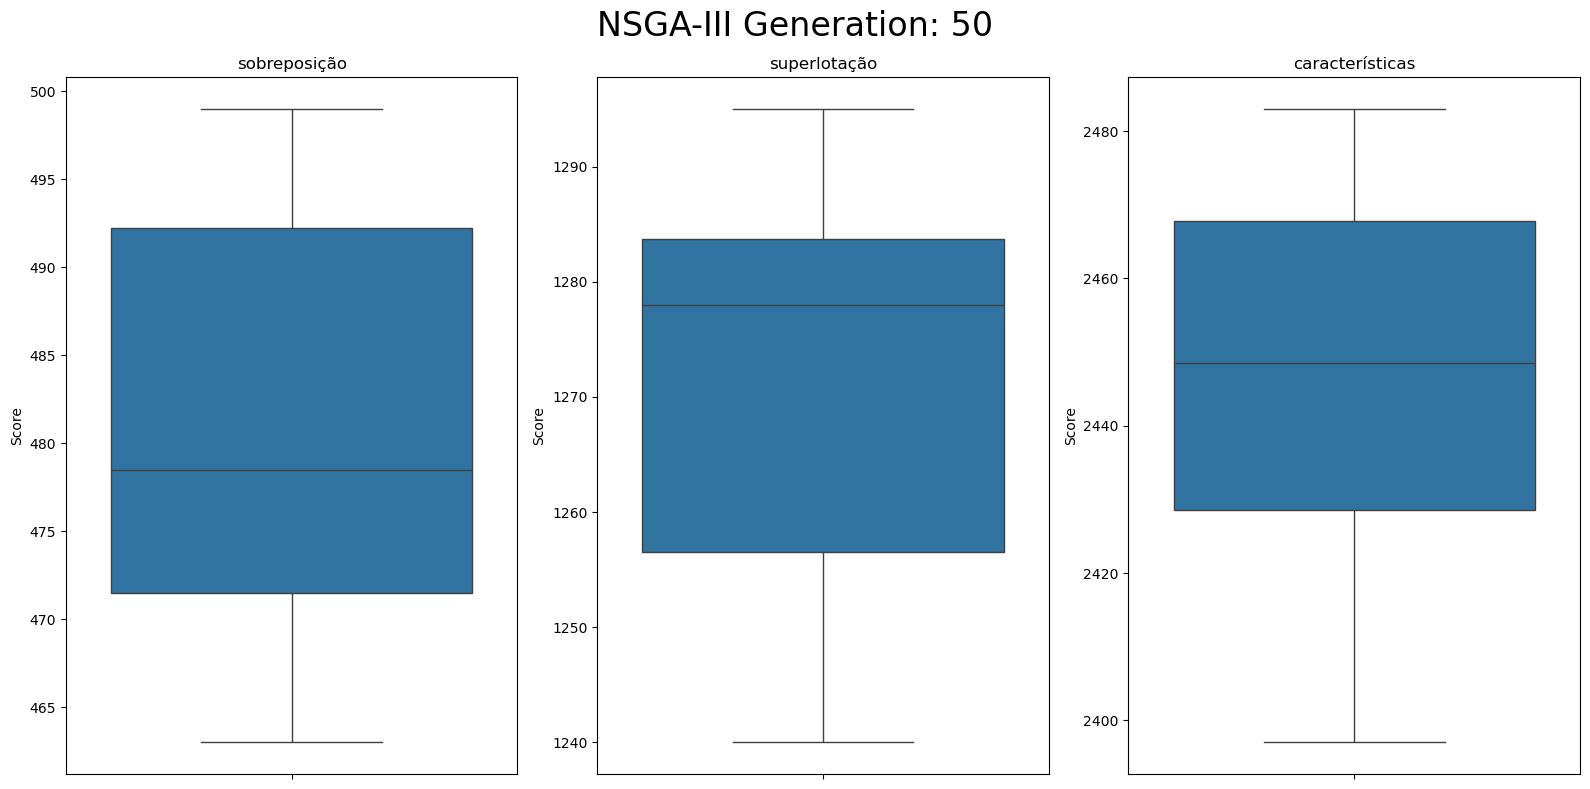

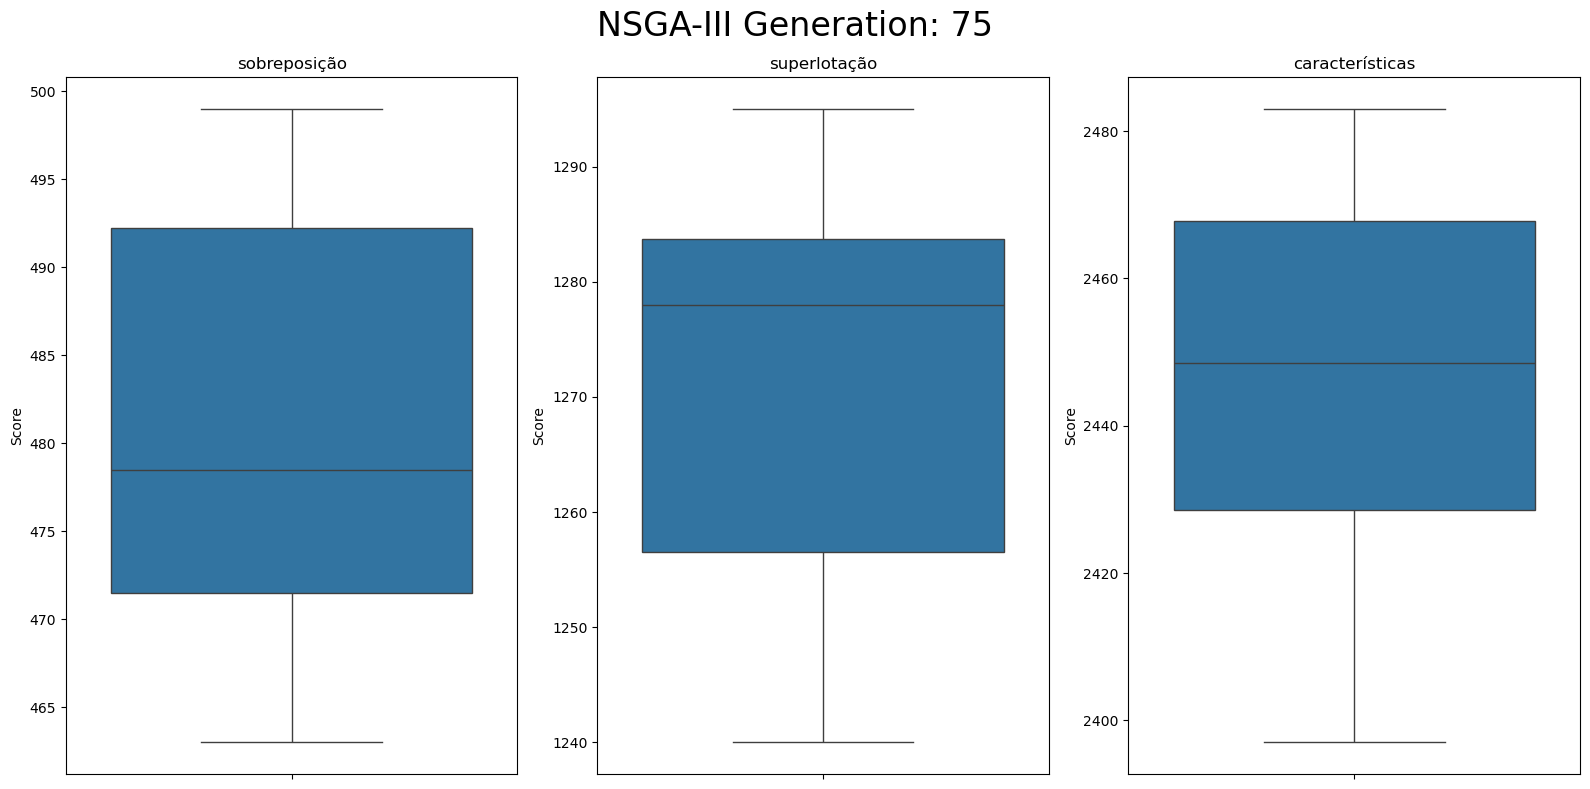

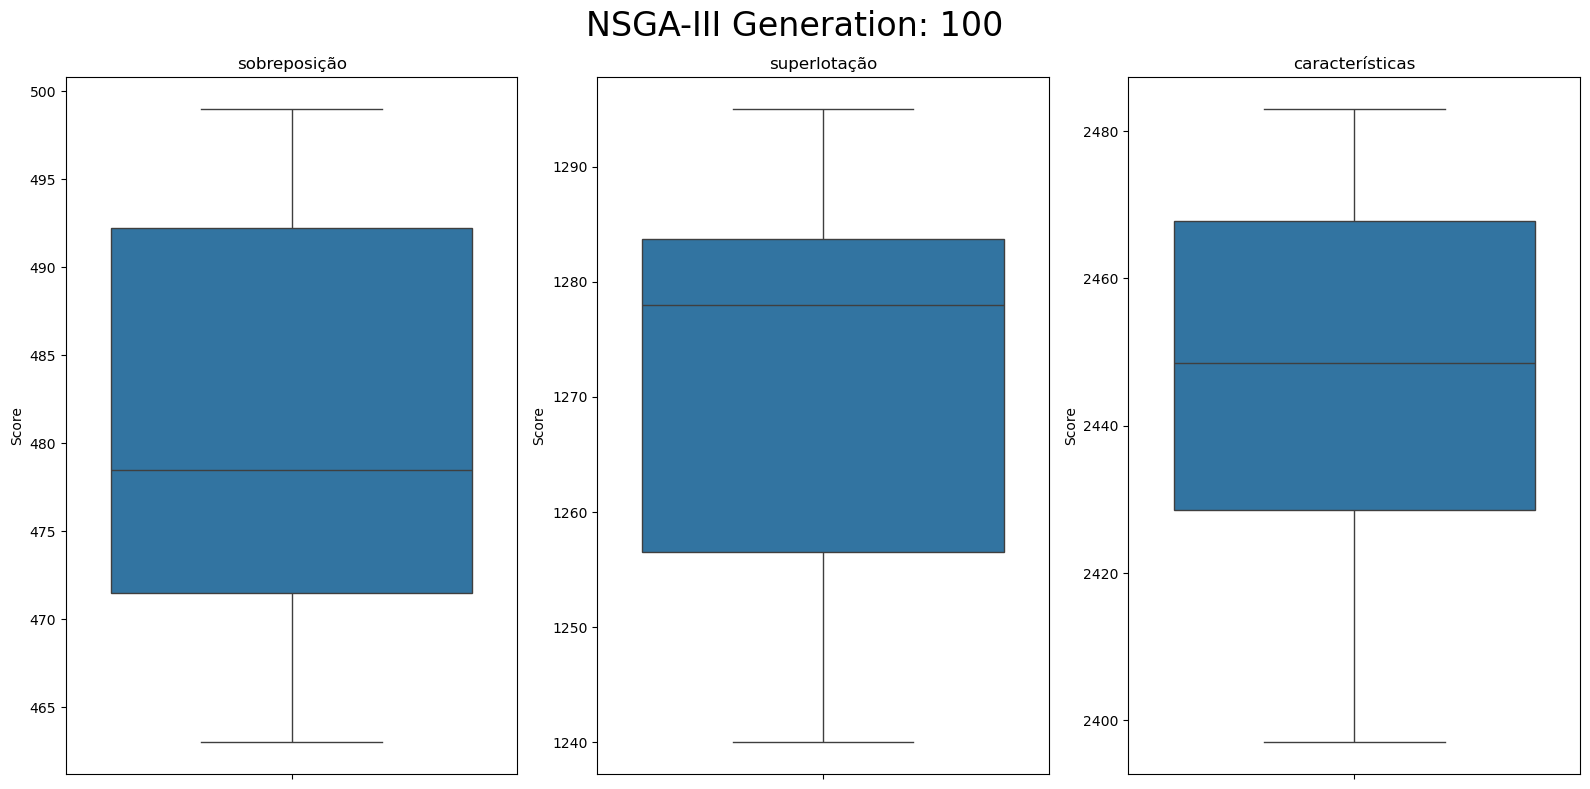

In [7]:
plot_boxes(df_nsga_iii_gen_1.drop("generation", axis=1), "NSGA-III Generation: 1")
plot_boxes(df_nsga_iii_gen_10.drop("generation", axis=1), "NSGA-III Generation: 10")
plot_boxes(df_nsga_iii_gen_25.drop("generation", axis=1), "NSGA-III Generation: 25")
plot_boxes(df_nsga_iii_gen_50.drop("generation", axis=1), "NSGA-III Generation: 50")
plot_boxes(df_nsga_iii_gen_75.drop("generation", axis=1), "NSGA-III Generation: 75")
plot_boxes(df_nsga_iii_gen_100.drop("generation", axis=1), "NSGA-III Generation: 100")

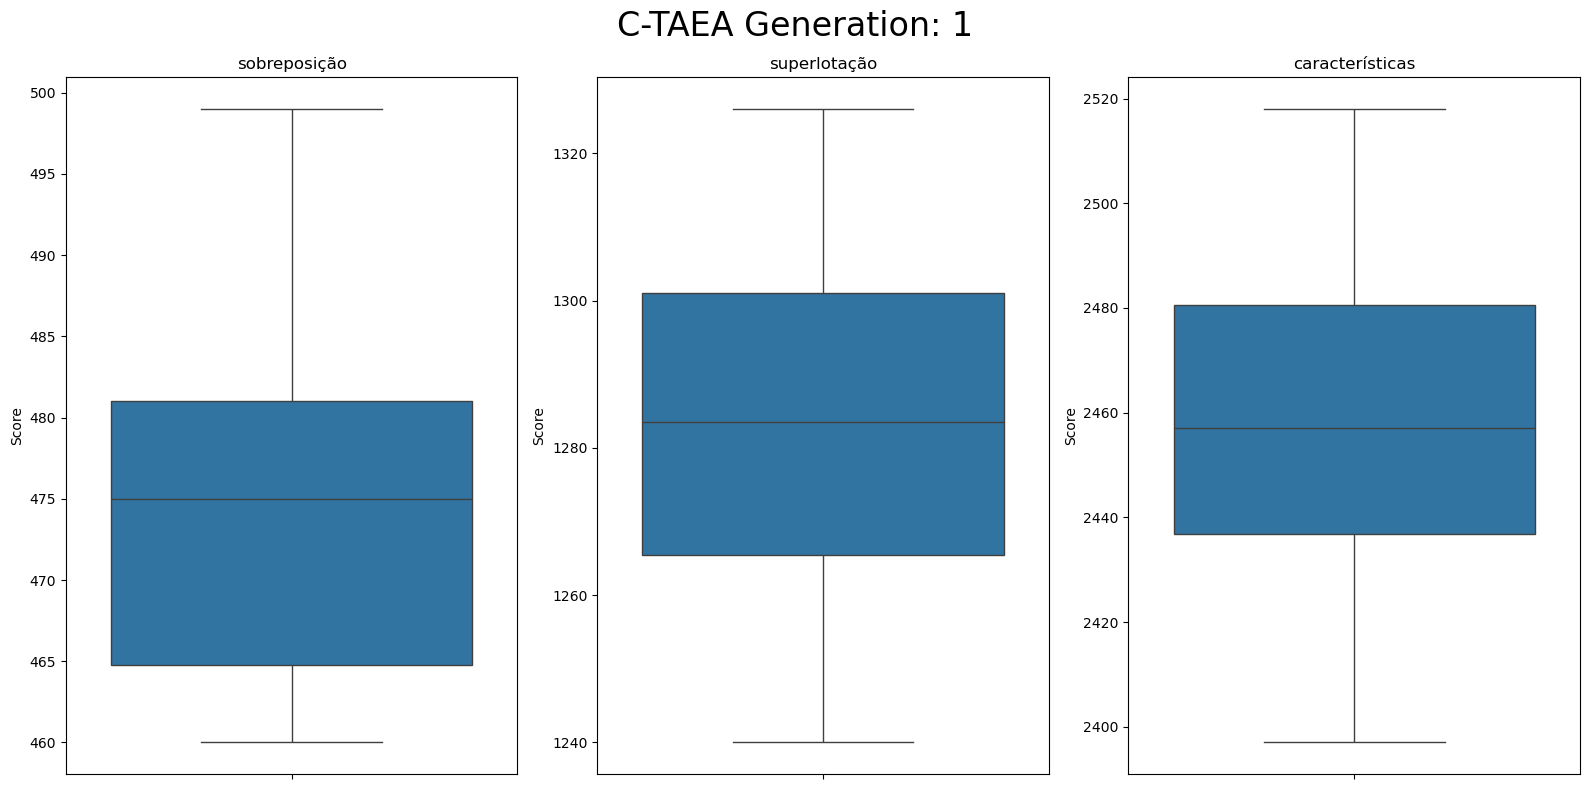

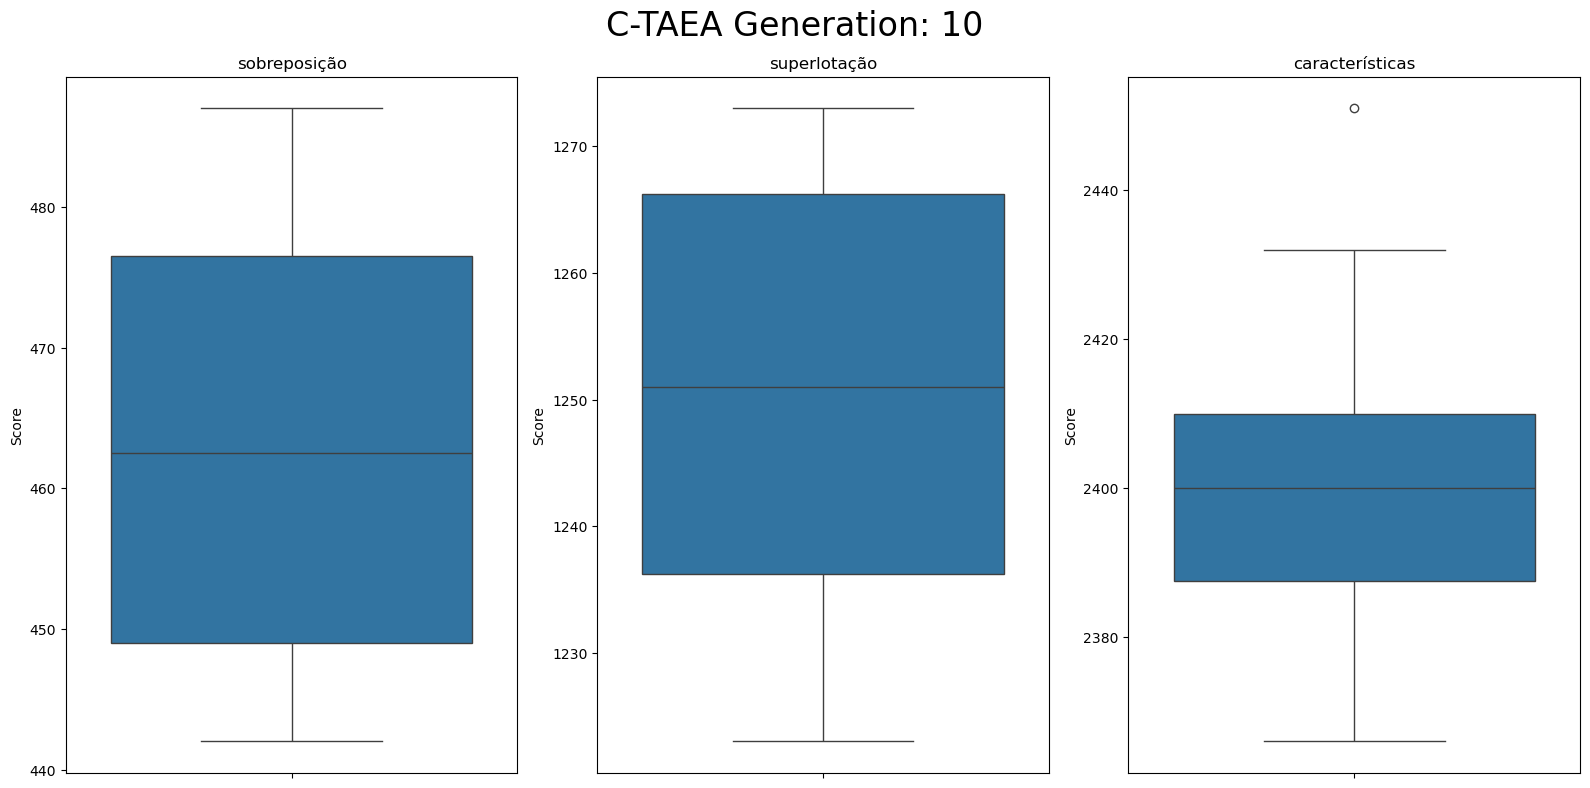

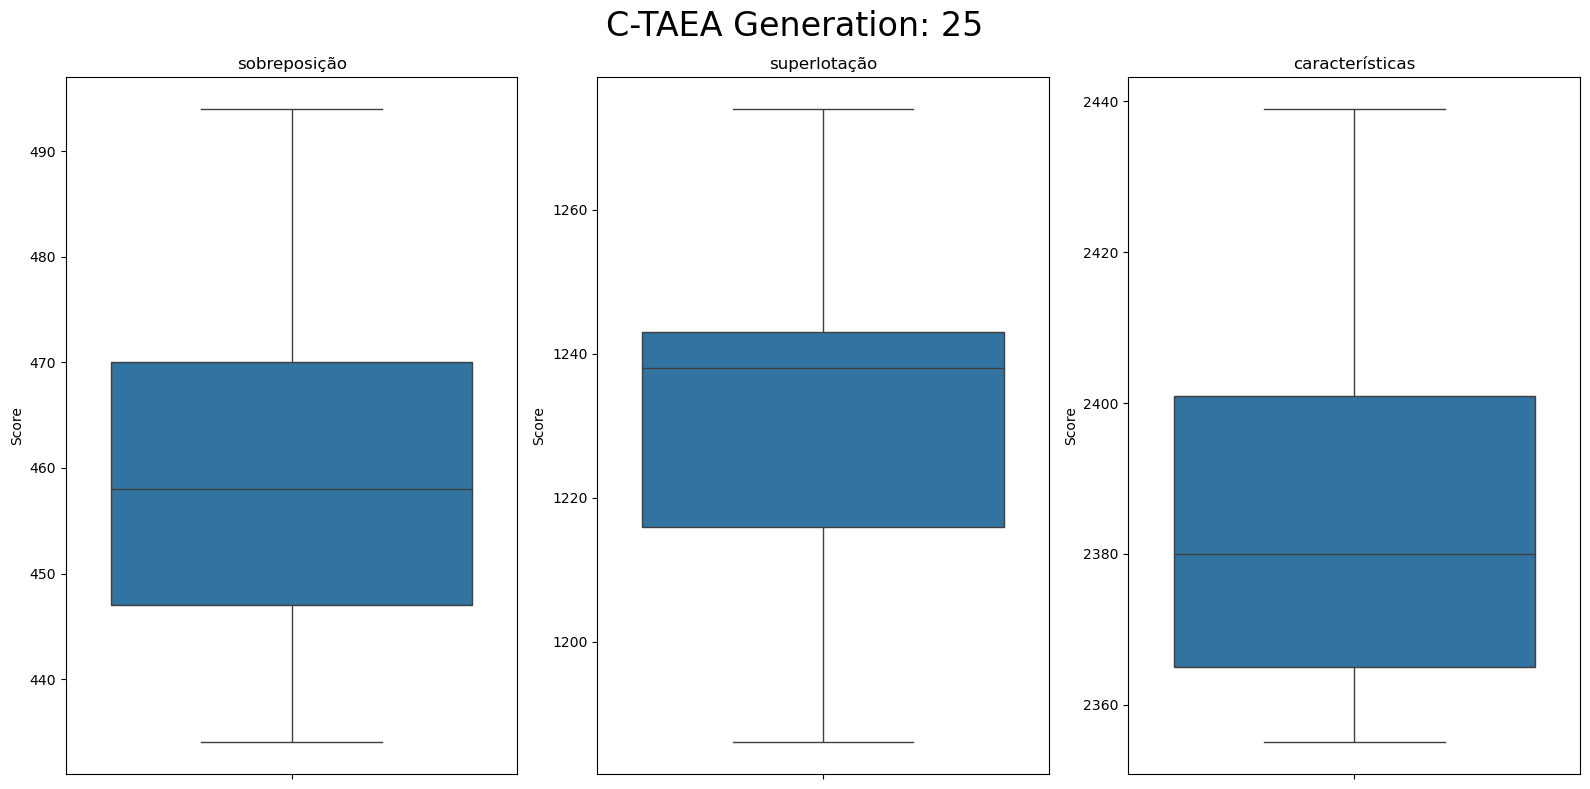

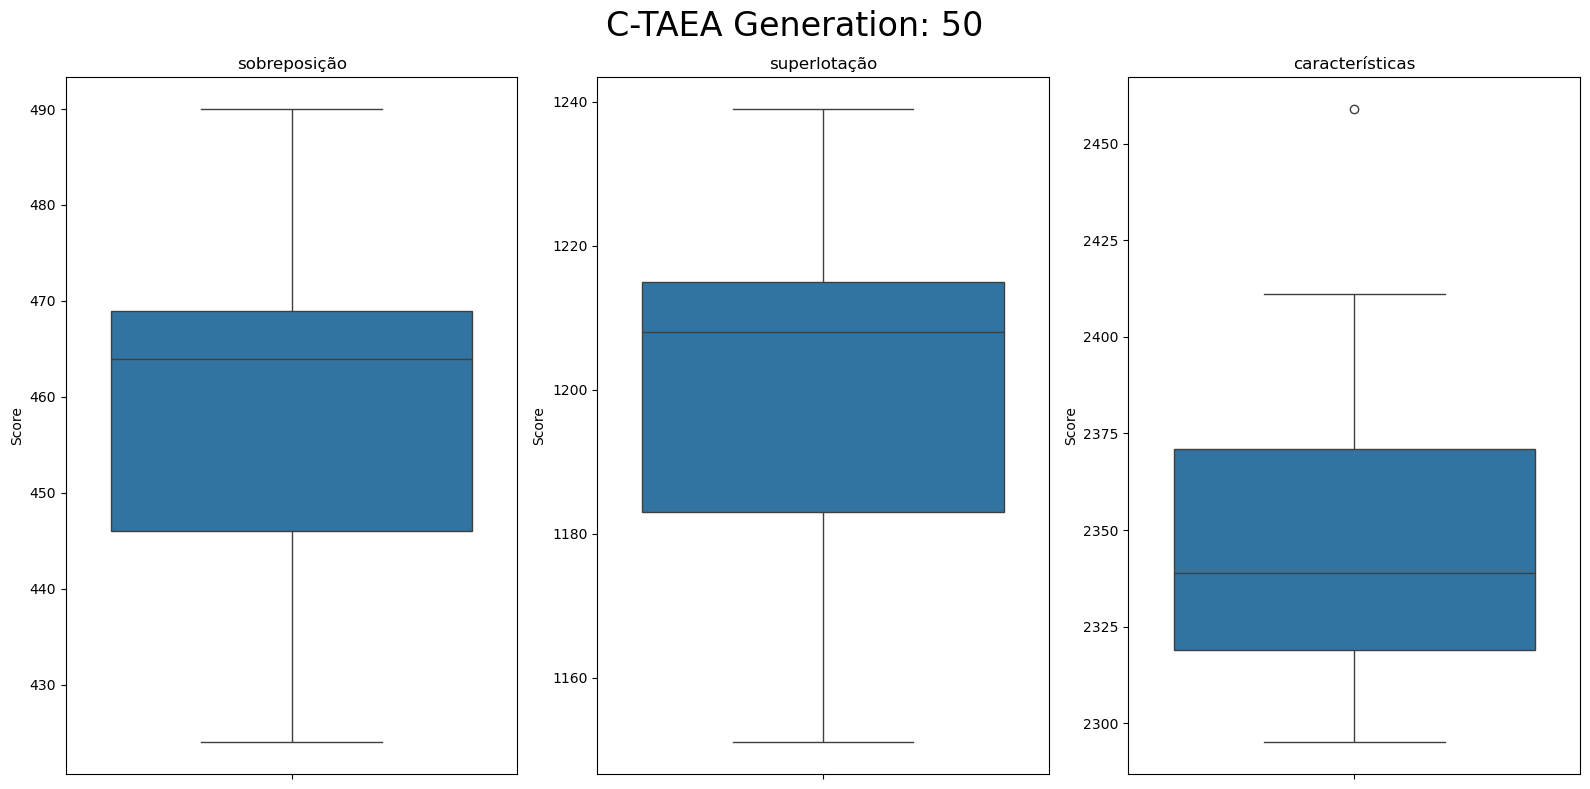

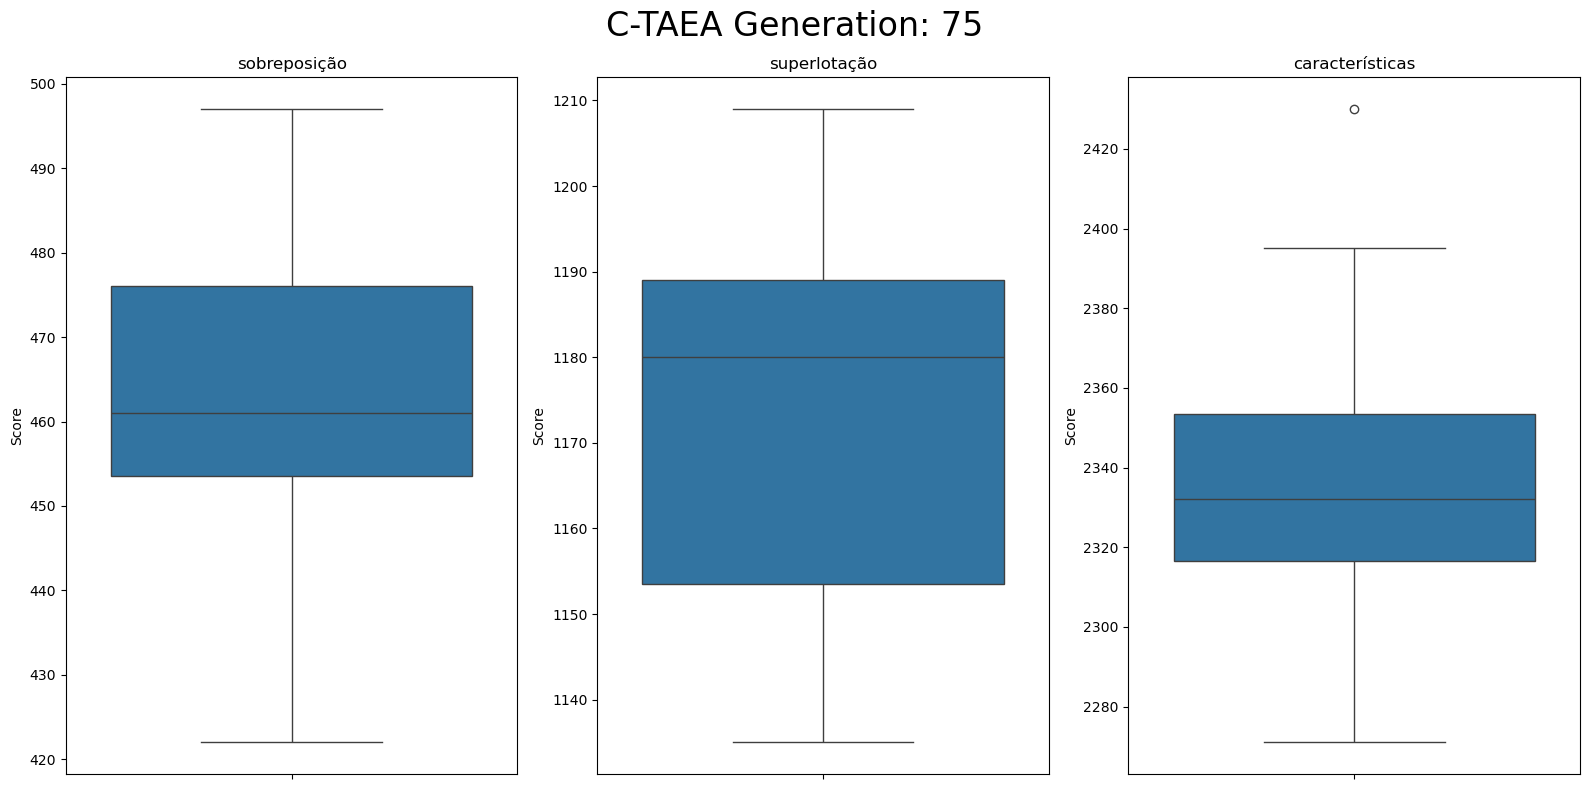

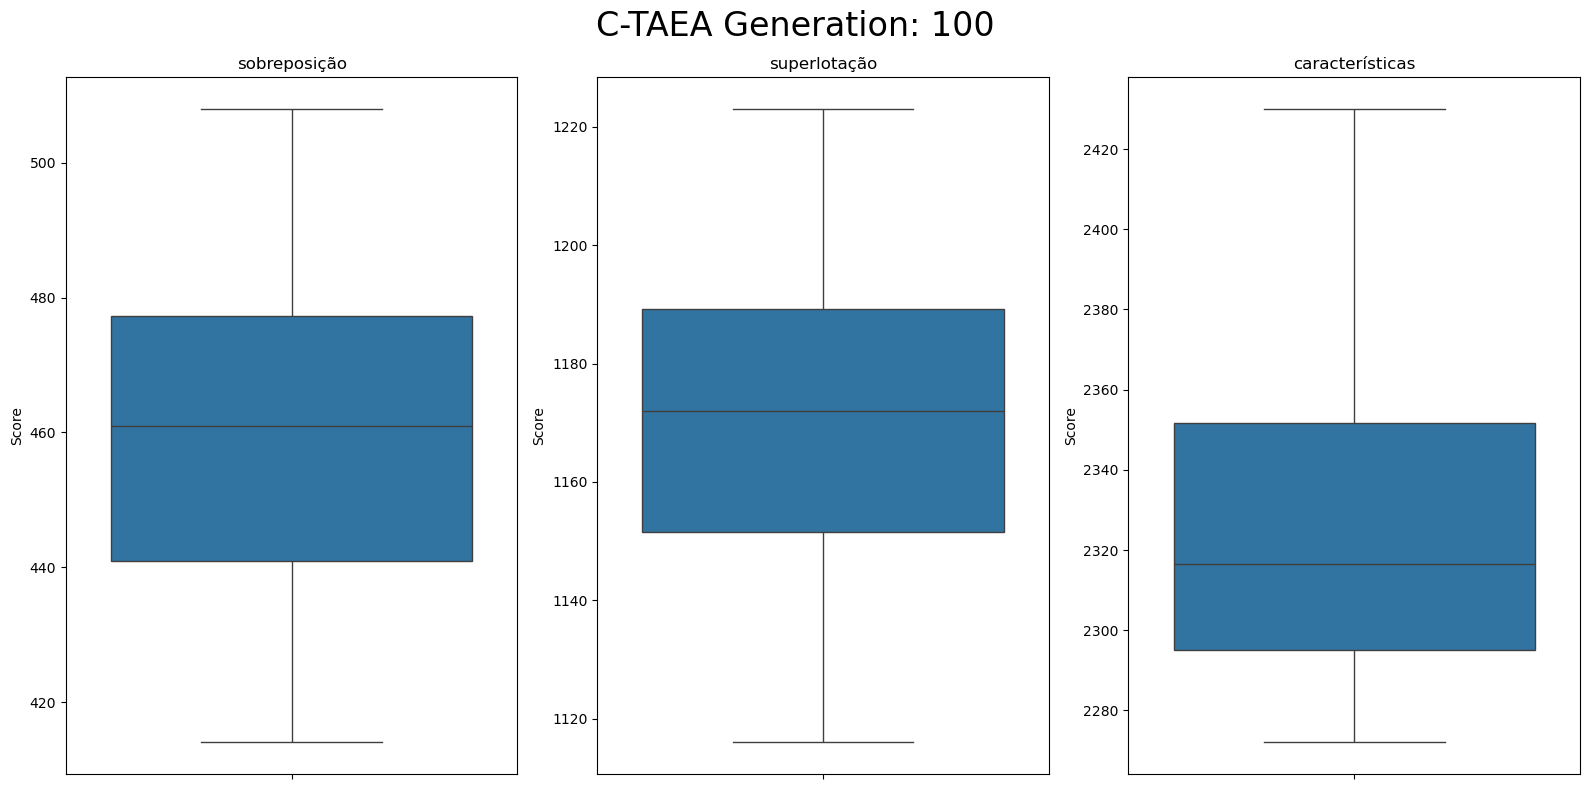

In [8]:
plot_boxes(df_c_taea_gen_1.drop("generation", axis=1), "C-TAEA Generation: 1")
plot_boxes(df_c_taea_gen_10.drop("generation", axis=1), "C-TAEA Generation: 10")
plot_boxes(df_c_taea_gen_25.drop("generation", axis=1), "C-TAEA Generation: 25")
plot_boxes(df_c_taea_gen_50.drop("generation", axis=1), "C-TAEA Generation: 50")
plot_boxes(df_c_taea_gen_75.drop("generation", axis=1), "C-TAEA Generation: 75")
plot_boxes(df_c_taea_gen_100.drop("generation", axis=1), "C-TAEA Generation: 100")

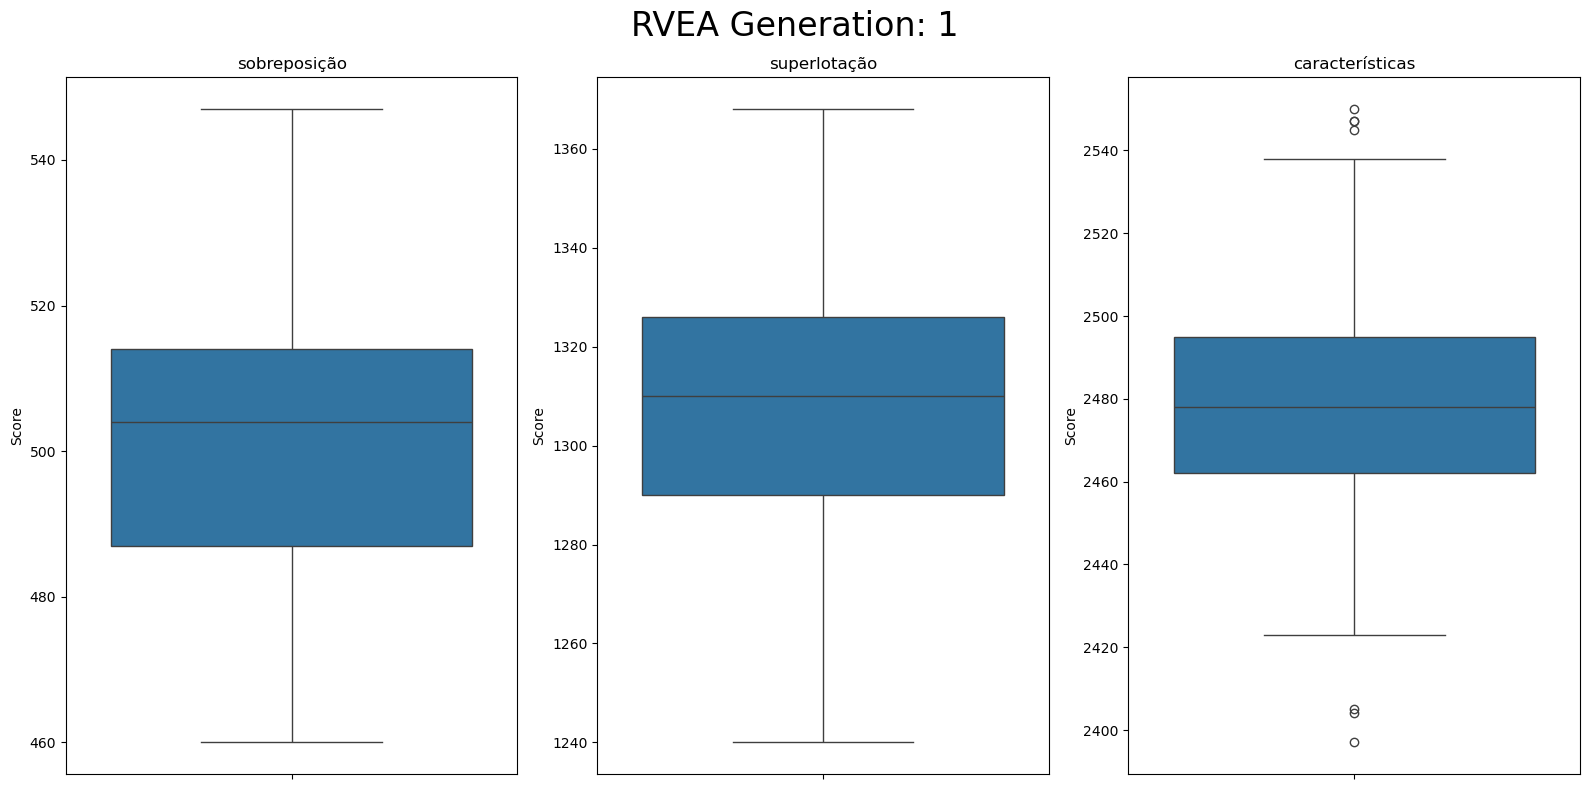

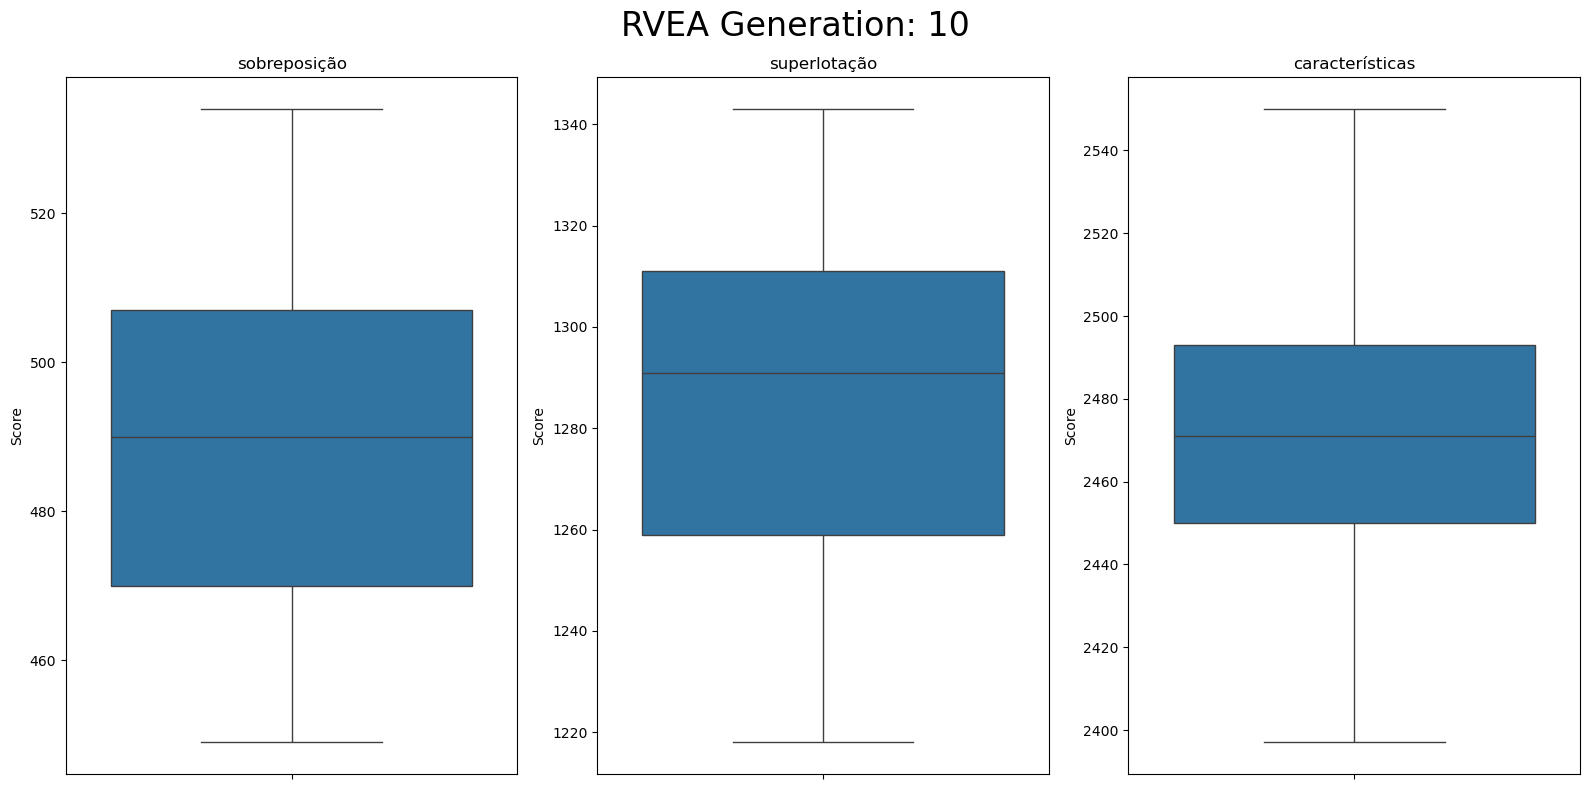

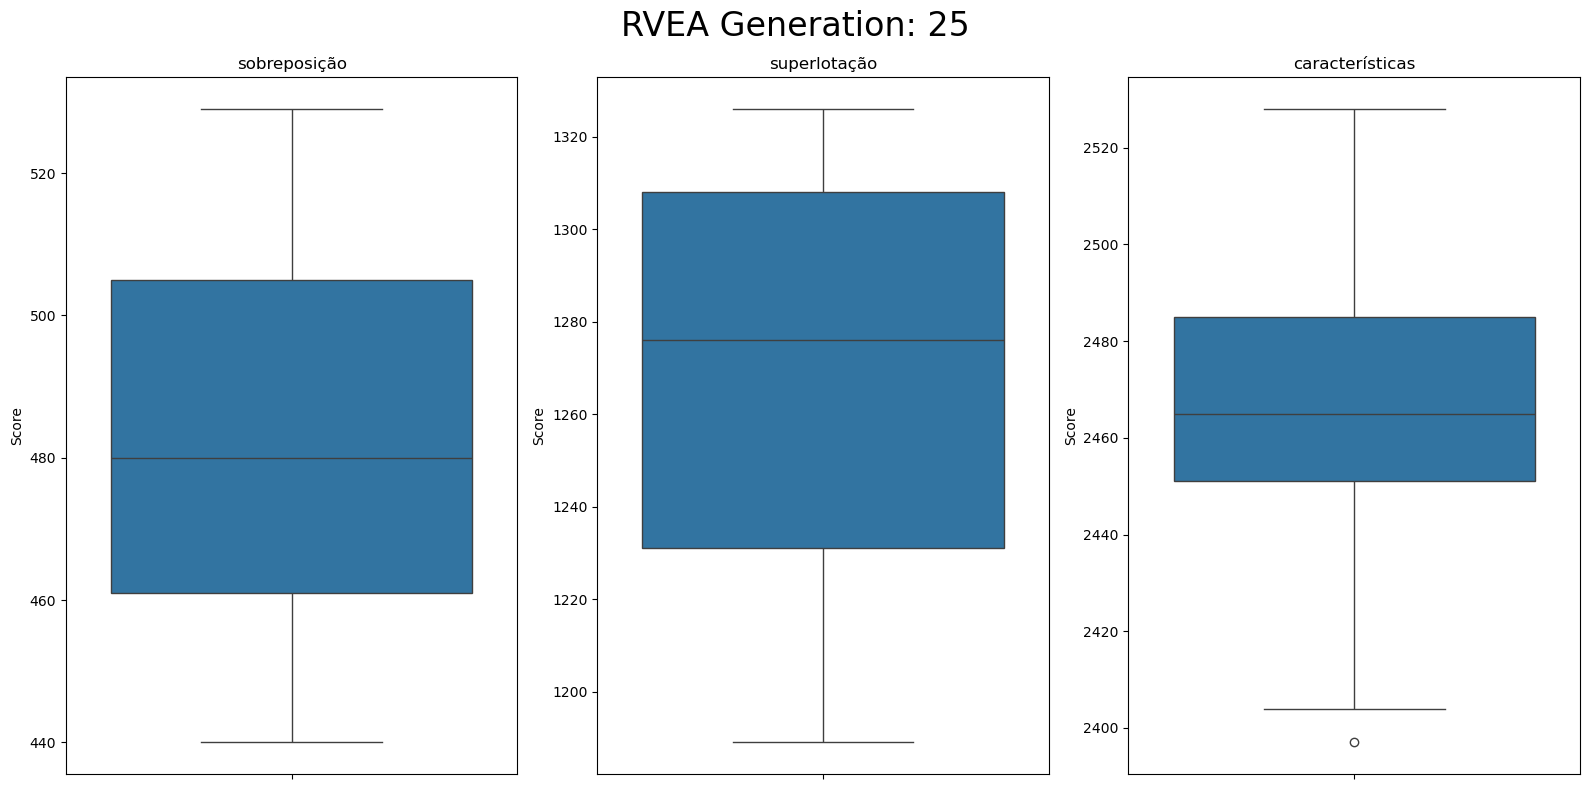

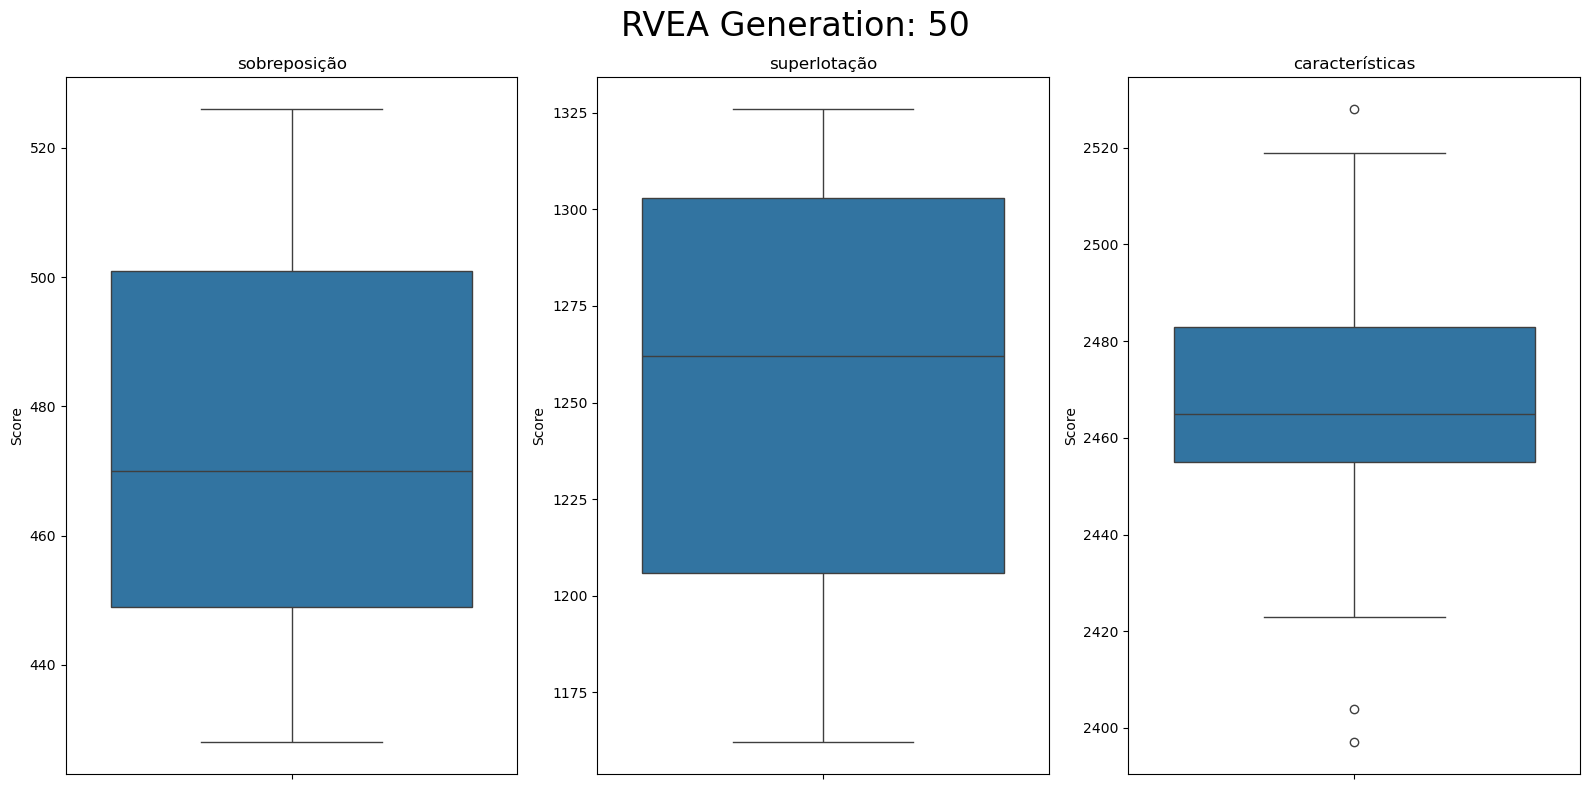

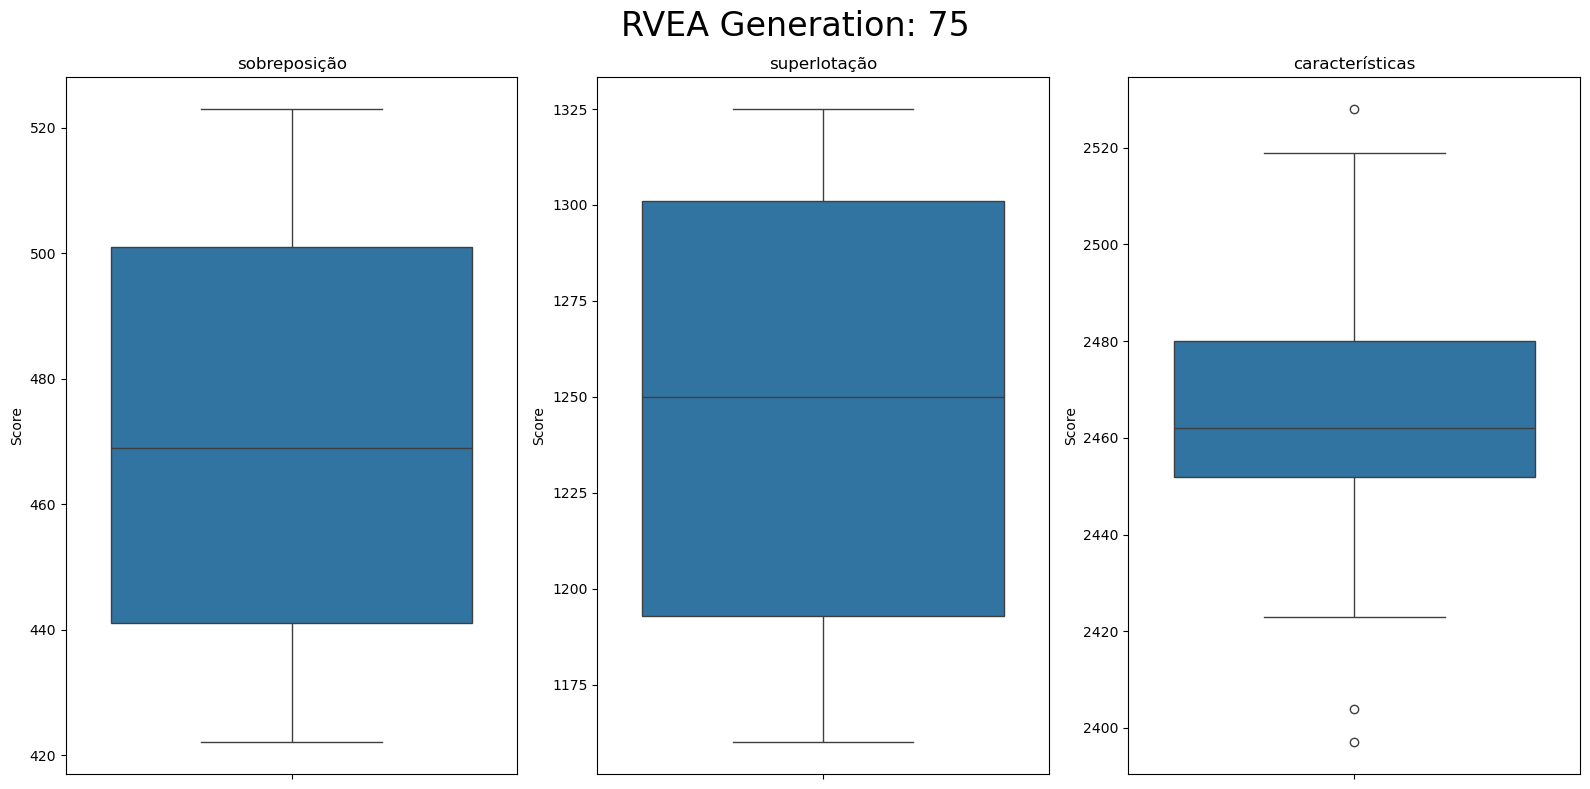

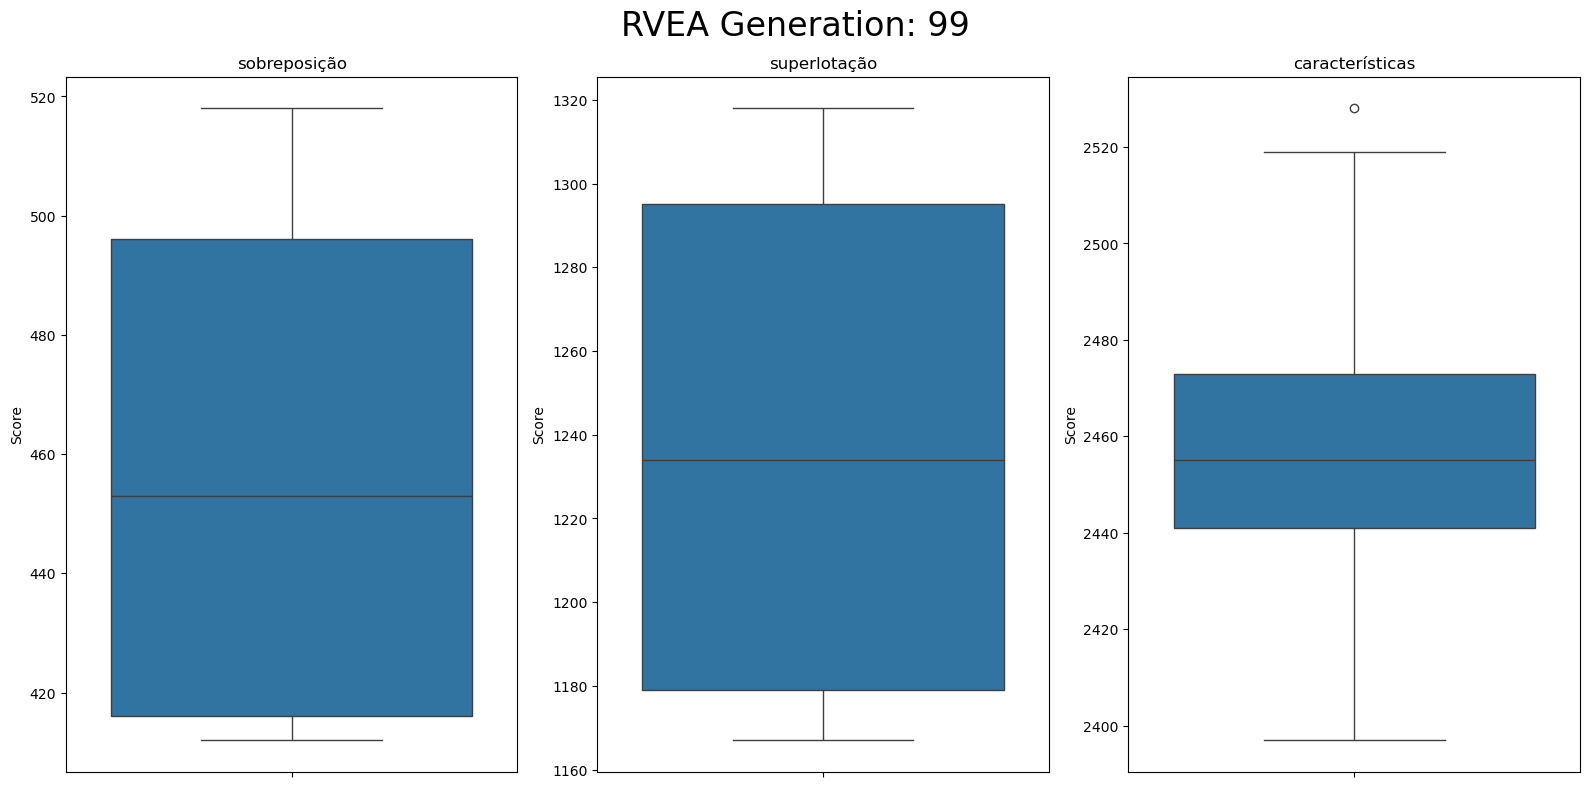

In [9]:
plot_boxes(df_rvea_gen_1.drop("generation", axis=1), "RVEA Generation: 1")
plot_boxes(df_rvea_gen_10.drop("generation", axis=1), "RVEA Generation: 10")
plot_boxes(df_rvea_gen_25.drop("generation", axis=1), "RVEA Generation: 25")
plot_boxes(df_rvea_gen_50.drop("generation", axis=1), "RVEA Generation: 50")
plot_boxes(df_rvea_gen_75.drop("generation", axis=1), "RVEA Generation: 75")
plot_boxes(df_rvea_gen_99.drop("generation", axis=1), "RVEA Generation: 99")